### Assessment 1 Part 1 
### Task 1: Data Preparation and Exploratory Data Analysis
We import all the necessary libraries that we'll use throughout our analysis.
#### Titanic EDA


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn.feature_selection import RFE



# Import the data
df = pd.read_csv('dataset/titanic.csv')

# Display basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [29]:
# Show summary statistics
print(df.describe())

# Display first few rows
print(df.head())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1        

In [30]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [31]:
df = df.drop(['Ticket', 'Cabin', 'Name','PassengerId'], axis=1)

In [32]:
# Check for missing values
print(df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [33]:
df['Age'] = df['Age'].fillna(df['Age'].median())




In [34]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [35]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [36]:
# We found the label encoder available at : https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 0: female, 1: male
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df['Family_Size'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the individual themselves

# Display the first few rows to verify the new feature
print(df[['SibSp', 'Parch', 'Family_Size']].head())


   SibSp  Parch  Family_Size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


             Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived     1.000000 -0.338481 -0.543351 -0.064910 -0.035322  0.081629   
Pclass      -0.338481  1.000000  0.131900 -0.339898  0.083081  0.018443   
Sex         -0.543351  0.131900  1.000000  0.081163 -0.114631 -0.245489   
Age         -0.064910 -0.339898  0.081163  1.000000 -0.233296 -0.172482   
SibSp       -0.035322  0.083081 -0.114631 -0.233296  1.000000  0.414838   
Parch        0.081629  0.018443 -0.245489 -0.172482  0.414838  1.000000   
Fare         0.257307 -0.549500 -0.182333  0.096688  0.159651  0.216225   
Embarked    -0.167675  0.162098  0.108262 -0.018754  0.068230  0.039798   
Family_Size  0.016639  0.065997 -0.200988 -0.245619  0.890712  0.783111   

                 Fare  Embarked  Family_Size  
Survived     0.257307 -0.167675     0.016639  
Pclass      -0.549500  0.162098     0.065997  
Sex         -0.182333  0.108262    -0.200988  
Age          0.096688 -0.018754    -0.245619  
SibSp        0

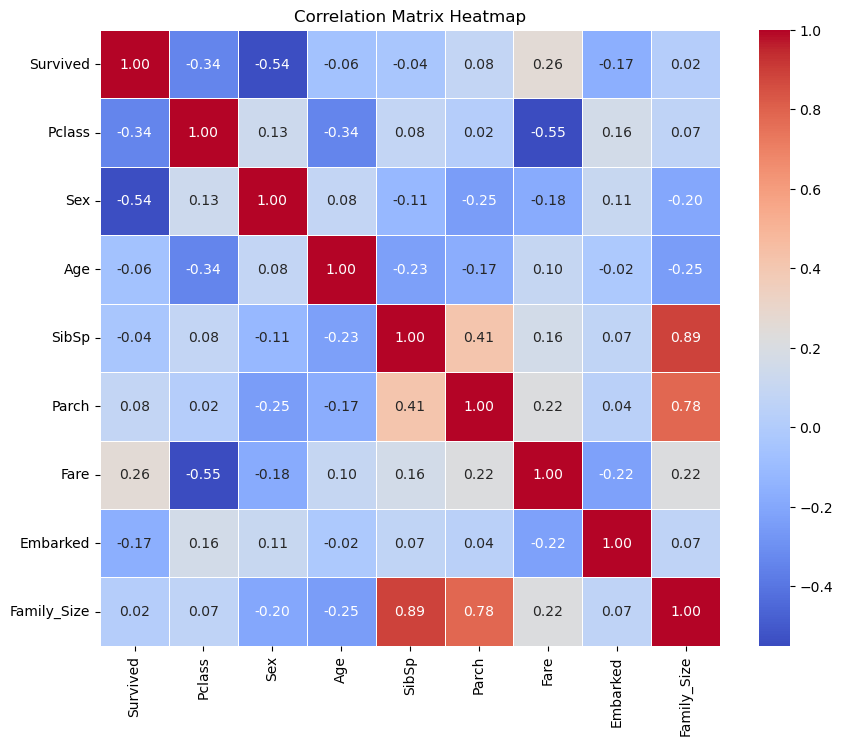

In [37]:
# For the correlation we used the df.corr() https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

correlation_matrix = df.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


##### Task 2 was answered in our report
The general knowledge for it was gathered by reading this article  https://medium.com/@wila.me/why-you-should-not-trust-only-in-accuracy-to-measure-machine-learning-performance-a72cf00b4516 

More precisely : <em>The accuracy is a simple way of measuring the effectiveness of your model, but it can be misleading. Don’t trust only on this measurement to evaluate how well your model performs. <em>



##### Task 3 : Logistic Regression 


In [50]:
# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html 
#Standardize features by removing the mean and scaling to unit variance.
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  
X_test_scaled = scaler.transform(X_test)

#https://scikit-learn.org/dev/modules/generated/sklearn.feature_selection.RFE.html
# Given an external estimator that assigns weights to features 
# (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE)
# is to select features by recursively considering smaller and smaller sets of features. 
#In our case we select the top 5 features
rfe = RFE(estimator=SKLogisticRegression(random_state=42), n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_val_selected = rfe.transform(X_val_scaled) 
X_test_selected = rfe.transform(X_test_scaled)


lr: 0.0001, num_iterations: 500, penalty: l1, penalty_param: 0.0, Mean CV Score: 0.7797
lr: 0.0001, num_iterations: 500, penalty: l1, penalty_param: 0.01, Mean CV Score: 0.7812
lr: 0.0001, num_iterations: 500, penalty: l1, penalty_param: 0.1, Mean CV Score: 0.7812
lr: 0.0001, num_iterations: 500, penalty: l1, penalty_param: 1, Mean CV Score: 0.6125
lr: 0.0001, num_iterations: 500, penalty: l1, penalty_param: 10, Mean CV Score: 0.6125
lr: 0.0001, num_iterations: 500, penalty: l2, penalty_param: 0.0, Mean CV Score: 0.7797
lr: 0.0001, num_iterations: 500, penalty: l2, penalty_param: 0.01, Mean CV Score: 0.7797
lr: 0.0001, num_iterations: 500, penalty: l2, penalty_param: 0.1, Mean CV Score: 0.7797
lr: 0.0001, num_iterations: 500, penalty: l2, penalty_param: 1, Mean CV Score: 0.7797
lr: 0.0001, num_iterations: 500, penalty: l2, penalty_param: 10, Mean CV Score: 0.7797
lr: 0.0001, num_iterations: 1000, penalty: l1, penalty_param: 0.0, Mean CV Score: 0.7797
lr: 0.0001, num_iterations: 1000, p

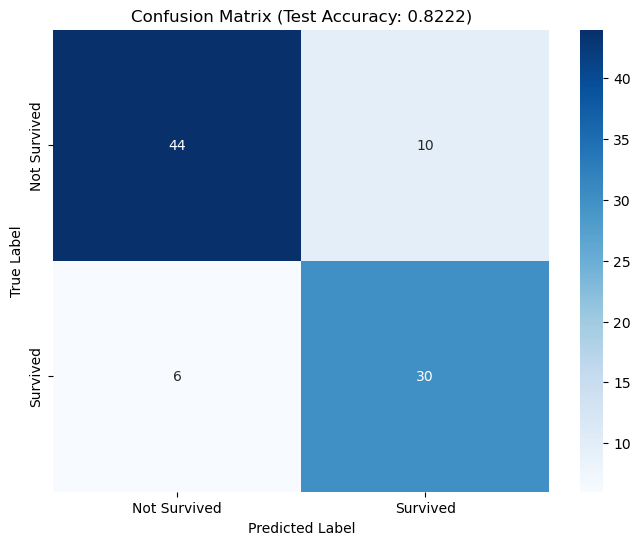


Feature Importance:
    feature  importance
1       Sex    1.043657
0    Pclass    0.732105
2       Age    0.250490
3     SibSp    0.241239
4  Embarked    0.149548


In [54]:

#
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, penalty='l2', penalty_param=0.0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.penalty = penalty
        self.penalty_param = penalty_param
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

      
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))

           
            if self.penalty == 'l2' and self.penalty_param > 0:
                dw += (self.penalty_param / num_samples) * self.weights
            elif self.penalty == 'l1' and self.penalty_param > 0:
                dw += self.penalty_param * np.sign(self.weights)

            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
     linear_model = np.dot(X, self.weights) + self.bias
     y_predicted = self.sigmoid(linear_model)
     # Convert probabilities to binary predictions
     y_predicted_binary = [1 if i > 0.5 else 0 for i in y_predicted]
     return np.array(y_predicted_binary)


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


def grid_search(X, y, param_grid, k=5):
    best_score = 0
    best_params = {}
    
    for lr in param_grid['learning_rate']:
        for num_iter in param_grid['num_iterations']:
            for penalty in param_grid['penalty']:
                for penalty_param in param_grid['penalty_param']:
                    cv_scores = []
                    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
                    
                    for train_index, val_index in kf.split(X, y):  
                        X_train_fold, X_val_fold = X[train_index], X[val_index]
                        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
                        
                        model = LogisticRegression(learning_rate=lr, num_iterations=num_iter,
                                                   penalty=penalty, penalty_param=penalty_param)
                        model.fit(X_train_fold, y_train_fold)
                        
                        y_val_pred = model.predict(X_val_fold)
                        fold_accuracy = accuracy(y_val_fold, y_val_pred)
                        cv_scores.append(fold_accuracy)
                    
                    mean_cv_score = np.mean(cv_scores)
                    if mean_cv_score > best_score:
                        best_score = mean_cv_score
                        best_params = {'learning_rate': lr, 'num_iterations': num_iter, 
                                       'penalty': penalty, 'penalty_param': penalty_param}
                    
                    print(f"lr: {lr}, num_iterations: {num_iter}, penalty: {penalty}, "
                          f"penalty_param: {penalty_param}, Mean CV Score: {mean_cv_score:.4f}")
    
    return best_params, best_score


param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01],
    'num_iterations': [500, 1000, 2000],
    'penalty': ['l1', 'l2'],
    'penalty_param': [0.0, 0.01, 0.1,1,10] 
}

best_params, best_score = grid_search(X_train_selected, y_train, param_grid)
print(f"\nBest parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

final_model = LogisticRegression(**best_params)
final_model.fit(X_train_selected, y_train)

y_val_pred = final_model.predict(X_val_selected)


val_accuracy = accuracy(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")


print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


y_test_pred = final_model.predict(X_test_selected)


test_accuracy = accuracy(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))
y_train_pred = final_model.predict(X_train_selected)
train_accuracy = accuracy(y_train, y_train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")


cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Test Accuracy: {test_accuracy:.4f})')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns[rfe.support_],
    'importance': np.abs(final_model.weights)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

